In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [2]:
insurance_data = pd.read_csv("insurance_dataset.csv")  # Replace with the actual file path


In [3]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,55,female,36.41,0,yes,northeast,NaN,NaN,Never,Student,Basic,11896.836610
1,64,female,20.12,2,no,northeast,High blood pressure,High blood pressure,Never,Blue collar,Basic,9563.655011
2,40,female,44.93,2,yes,northeast,NaN,Diabetes,Occasionally,Unemployed,Basic,14036.544130
3,22,female,32.13,5,yes,northeast,Diabetes,NaN,Never,Student,Basic,13669.577830
4,64,female,29.31,2,no,northeast,High blood pressure,NaN,Frequently,Unemployed,Basic,9414.800786


In [4]:
# Inspect data types
print(insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250343 entries, 0 to 250342
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     250343 non-null  int64  
 1   gender                  250343 non-null  object 
 2   bmi                     250343 non-null  float64
 3   children                250343 non-null  int64  
 4   smoker                  250343 non-null  object 
 5   region                  250343 non-null  object 
 6   medical_history         187802 non-null  object 
 7   family_medical_history  187725 non-null  object 
 8   exercise_frequency      250343 non-null  object 
 9   occupation              250343 non-null  object 
 10  coverage_level          250343 non-null  object 
 11  charges                 250343 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 22.9+ MB
None


In [5]:
# Describe the dataset
print(insurance_data.describe())

                 age            bmi       children        charges
count  250343.000000  250343.000000  250343.000000  250343.000000
mean       41.480013      34.000960       2.498624   17235.915140
std        13.880756       9.235525       1.707251    4406.706136
min        18.000000      18.000000       0.000000    4011.061723
25%        29.000000      26.010000       1.000000   14111.826735
50%        41.000000      33.980000       2.000000   17115.127360
75%        53.000000      42.000000       4.000000   20280.361240
max        65.000000      50.000000       5.000000   32561.560370


# Data Cleaning & tranformation

In [6]:
# Check for duplicates
print(insurance_data.duplicated().sum())

0


In [7]:
# Check for missing values
print(insurance_data.isnull().sum())

age                           0
gender                        0
bmi                           0
children                      0
smoker                        0
region                        0
medical_history           62541
family_medical_history    62618
exercise_frequency            0
occupation                    0
coverage_level                0
charges                       0
dtype: int64


In [8]:
##fill the null values as 'No history', to avoid data loss

In [9]:
# Replace 'None' with 'No history' in medical-related columns
insurance_data['medical_history'].fillna('No history', inplace=True)
insurance_data['family_medical_history'].fillna('No history', inplace=True)

In [10]:
# Check for missing values
print(insurance_data.isnull().sum())

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64


In [11]:
##fixing the data types
## bmi, children, charges - int/float
## convert caegorical columns - gender, region, smoker etc - categories

In [12]:
insurance_data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [60]:
insurance_data['is_active'] = insurance_data['exercise_frequency'].apply(lambda x: x in ['Frequently', 'Occasionally'])

In [61]:
# Feature Engineering weight_status
insurance_data['weight_status'] = np.where(insurance_data['bmi'] < 18.000, 'underweigth',
                               np.where(insurance_data['bmi'] < 25.000, 'normal',
                                       np.where(insurance_data['bmi'] < 30.000, 'overweight', 'obese')))

In [62]:
categorical_columns = ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level','weight_status']

for col in categorical_columns:
    insurance_data[col] = insurance_data[col].astype('category')

In [63]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250343 entries, 0 to 250342
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     250343 non-null  int64   
 1   gender                  250343 non-null  category
 2   bmi                     250343 non-null  float64 
 3   children                250343 non-null  int64   
 4   smoker                  250343 non-null  category
 5   region                  250343 non-null  category
 6   medical_history         250343 non-null  category
 7   family_medical_history  250343 non-null  category
 8   exercise_frequency      250343 non-null  category
 9   occupation              250343 non-null  category
 10  coverage_level          250343 non-null  category
 11  charges                 250343 non-null  float64 
 12  is_child                250343 non-null  bool    
 13  is_active               250343 non-null  bool    
 14  weig

Text(0.5, 1.0, 'Boxplot of BMI')

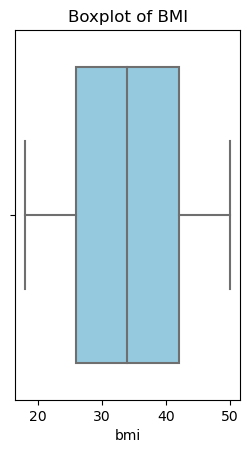

In [64]:
# Boxplot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(data=insurance_data, x='bmi', color='skyblue')
plt.title("Boxplot of BMI")

Text(0.5, 1.0, 'Boxplot of Charges')

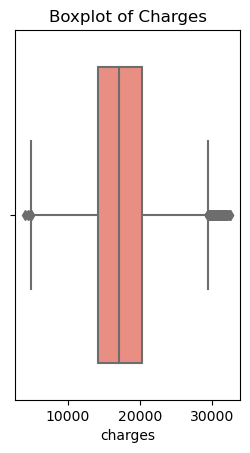

In [65]:
# Boxplot for Charges
plt.subplot(1, 2, 2)
sns.boxplot(data=insurance_data, x='charges', color='salmon')
plt.title("Boxplot of Charges")

In [66]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound =  Q1 - 1.5*IQR
    upper_bound =  Q3 + 1.5*IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [67]:
bmi_outliers, bmi_lower, bmi_upper = detect_outliers_iqr(insurance_data, 'bmi')

In [68]:
charges_outliers, charges_lower, charges_upper = detect_outliers_iqr(insurance_data, 'bmi')

In [69]:
print("BMI Outliers:" , bmi_outliers)

BMI Outliers: Empty DataFrame
Columns: [age, gender, bmi, children, smoker, region, medical_history, family_medical_history, exercise_frequency, occupation, coverage_level, charges, is_child, is_active, weight_status]
Index: []


In [70]:
print("charges Outliers:" , charges_outliers)

charges Outliers: Empty DataFrame
Columns: [age, gender, bmi, children, smoker, region, medical_history, family_medical_history, exercise_frequency, occupation, coverage_level, charges, is_child, is_active, weight_status]
Index: []


In [71]:
#Create a New Feature: is_child & is active
insurance_data['is_child'] = insurance_data['age'] < 18

In [72]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,is_child,is_active,weight_status
0,55,female,36.41,0,yes,northeast,No history,No history,Never,Student,Basic,11896.836610,False,False,obese
1,64,female,20.12,2,no,northeast,High blood pressure,High blood pressure,Never,Blue collar,Basic,9563.655011,False,False,normal
2,40,female,44.93,2,yes,northeast,No history,Diabetes,Occasionally,Unemployed,Basic,14036.544130,False,True,obese
3,22,female,32.13,5,yes,northeast,Diabetes,No history,Never,Student,Basic,13669.577830,False,False,obese
4,64,female,29.31,2,no,northeast,High blood pressure,No history,Frequently,Unemployed,Basic,9414.800786,False,True,overweight


In [73]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,is_child,is_active,weight_status
0,55,female,36.41,0,yes,northeast,No history,No history,Never,Student,Basic,11896.836610,False,False,obese
1,64,female,20.12,2,no,northeast,High blood pressure,High blood pressure,Never,Blue collar,Basic,9563.655011,False,False,normal
2,40,female,44.93,2,yes,northeast,No history,Diabetes,Occasionally,Unemployed,Basic,14036.544130,False,True,obese
3,22,female,32.13,5,yes,northeast,Diabetes,No history,Never,Student,Basic,13669.577830,False,False,obese
4,64,female,29.31,2,no,northeast,High blood pressure,No history,Frequently,Unemployed,Basic,9414.800786,False,True,overweight


In [74]:
##check for unique values:

In [75]:
unique_values = []

for col in ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'weight_status']:
    unique_counts = insurance_data[col].value_counts()
    for value, count in unique_counts.items():
        unique_values.append([col, value, count])
        
#Convert to Dataframe
unique_values_df = pd.DataFrame(unique_values, columns = ['Column', 'Unique Value', 'Count'])
   
# Display the results
unique_values_df

,Column,Unique Value,Count
0,gender,female,125211
1,gender,male,125132
2,smoker,no,125381
3,smoker,yes,124962
4,region,northeast,250343
5,medical_history,Heart disease,62743
6,medical_history,No history,62541
7,medical_history,High blood pressure,62537
8,medical_history,Diabetes,62522
9,family_medical_history,Diabetes,62758


# EDA: 

Average amount of payment grouped by age, gender & occupation for the premium/standard/basic coverage level

<Axes: xlabel='age_group'>

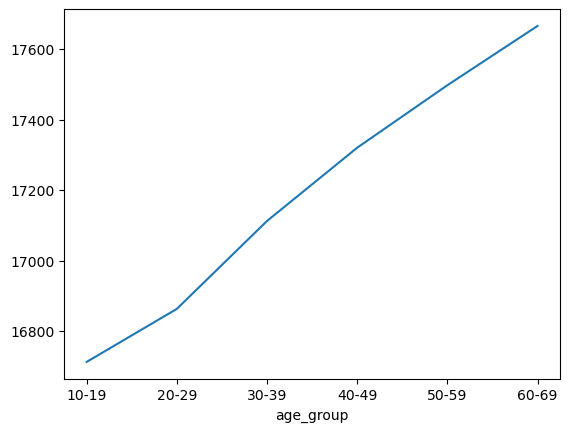

In [76]:
df02=insurance_data.copy()
df02["age_group"] = pd.cut(x = insurance_data["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80],
                         labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"], right = False)
df02.groupby(['age_group'])['charges'].mean().plot.line()

#Inference: As the age increases the charges increases tooo

<Axes: xlabel='gender'>

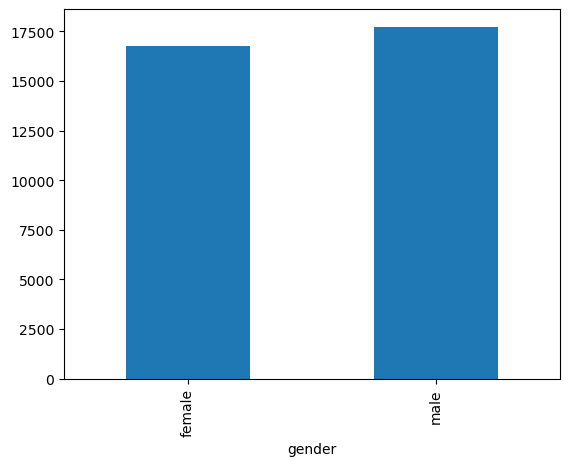

In [77]:
insurance_data.groupby(['gender'])['charges'].mean().plot.bar()

Inference: Males charges are more than females

<Axes: xlabel='occupation'>

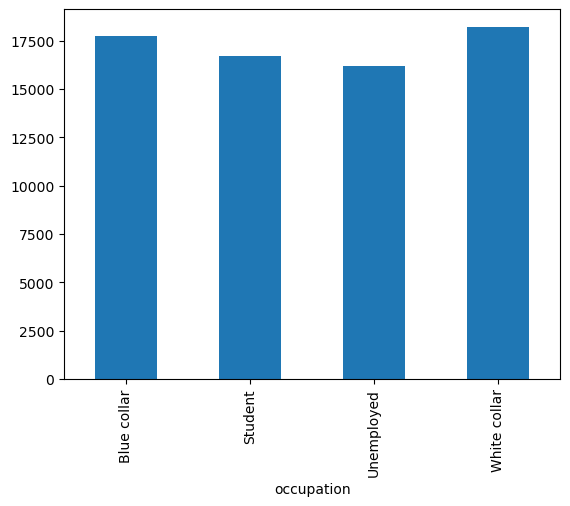

In [78]:
insurance_data.groupby(['occupation'])['charges'].mean().plot.bar()

Inference: White collar occupation have more charges follwed by Blue collar & least by Unemployed

<Axes: xlabel='medical_history'>

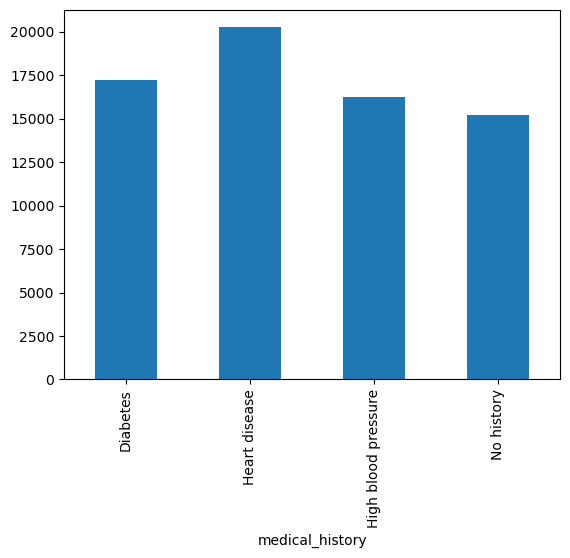

In [79]:
insurance_data.groupby(['medical_history'])['charges'].mean().plot.bar()

Inference: Population having Heart Disease seems to pay higher in their insurance cost

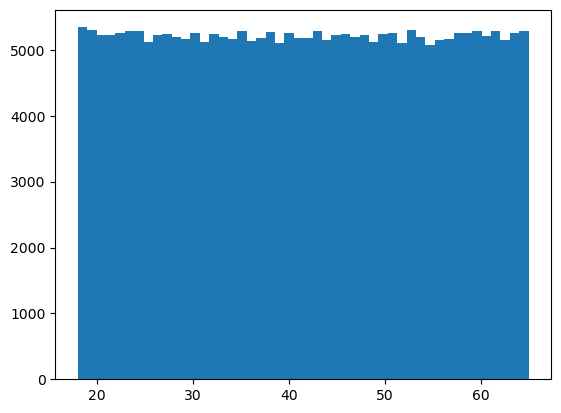

In [80]:
fig = plt.hist(insurance_data['age'],bins=48
                  )

Distribution of Age in the Dataset is almost uniform

Text(0.5, 1.0, 'Distibution of Body Mass Index')

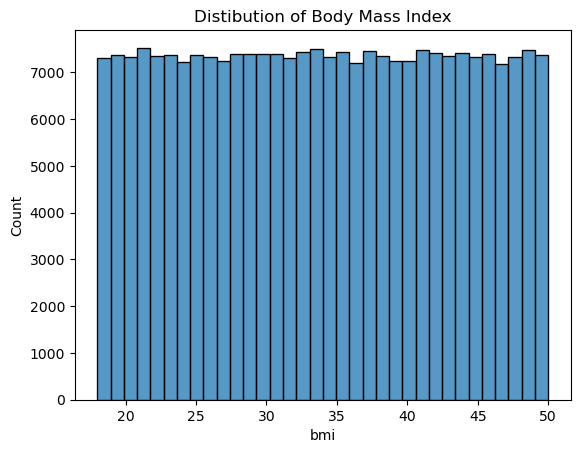

In [81]:
fig = sns.histplot(insurance_data,x='bmi',
                   bins=34)
plt.title('Distibution of Body Mass Index')

The distribution of Body Mass Index (BMI) appears to be relatively uniform

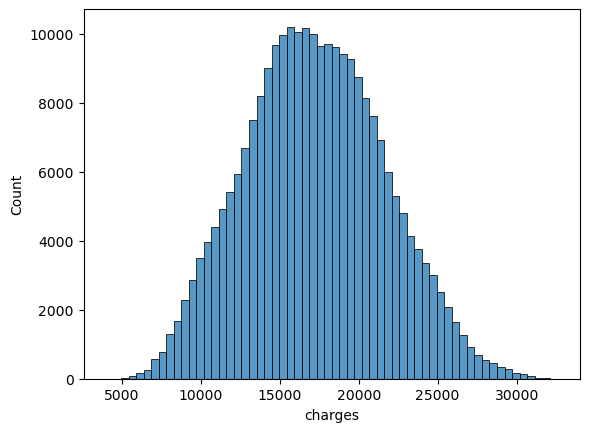

17235.9151395376


In [82]:
fig = sns.histplot(data=insurance_data,
                  x='charges',
                   bins=60
                   
                  )
plt.show()
print(insurance_data['charges'].mean())

We can see that distribution of Annual Medical Charges, seems to Normally distributed with average charges of $17,000.

count    250343.000000
mean      17235.915140
std        4406.706136
min        4011.061723
25%       14111.826735
50%       17115.127360
75%       20280.361240
max       32561.560370
Name: charges, dtype: float64 


count    125381.000000
mean      14739.368918
std        3626.997174
min        4011.061723
25%       12085.220200
50%       14596.929520
75%       17158.398080
max       27581.941480
Name: charges, dtype: float64 


count    124962.000000
mean      19740.832329
std        3629.850717
min        9304.284168
25%       17084.507607
50%       19609.143500
75%       22188.723613
max       32561.560370
Name: charges, dtype: float64


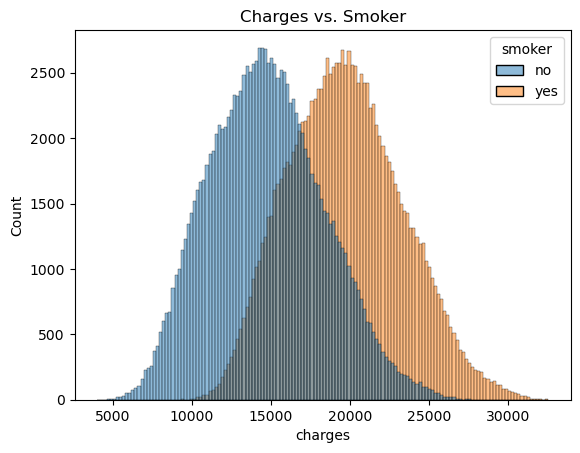

In [83]:
fig = sns.histplot(insurance_data,
                  x='charges',
                  hue='smoker'                 
)
plt.title('Charges vs. Smoker')
print(insurance_data['charges'].describe(),'\n\n')
print(insurance_data[insurance_data['smoker']=='no']['charges'].describe(),'\n\n')
print(insurance_data[insurance_data['smoker']=='yes']['charges'].describe())

We can see two groups (smokers) within the distribution of charges which is also normally distributed.

For most of the customers, the annual medical charges are under $19,000. Only small fraction of customer have higher medical expeses.

Also, further there is significant pattern in the medical expenses of smokers and non-smokers. Median expenses of non-smoker is $14000, and  the  median  expenses of smokers is near to $19,000.

In [84]:
# 7. Grouping by Smoker and Gender to calculate mean charges
smoker_gender_group = insurance_data.groupby(['smoker', 'gender'])['charges'].mean().reset_index()
print("\nMean Charges Grouped by Smoker and Gender:")
print(smoker_gender_group)


Mean Charges Grouped by Smoker and Gender:
  smoker  gender       charges
0     no  female  14232.012394
1     no    male  15244.327491
2    yes  female  19249.902885
3    yes    male  20234.725018


<Axes: xlabel='gender', ylabel='charges'>

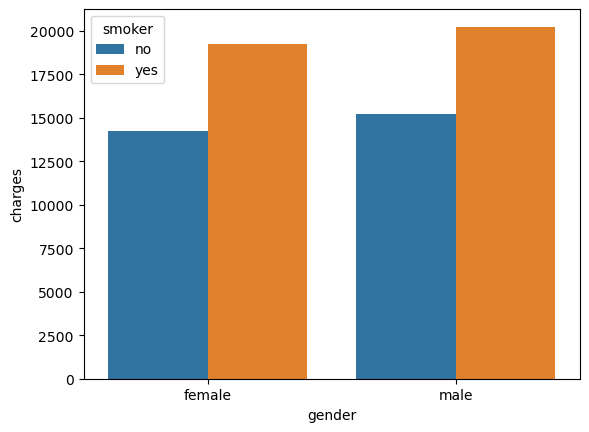

In [85]:
sns.barplot(x = smoker_gender_group['gender'], y = smoker_gender_group['charges'], hue = smoker_gender_group['smoker'], data = smoker_gender_group)


Inference: It is noteworthy that male customers are likely to have higher expenses compared to females. & also in general irrespective gender higher charges for those who smoke

<Axes: xlabel='charges', ylabel='Count'>

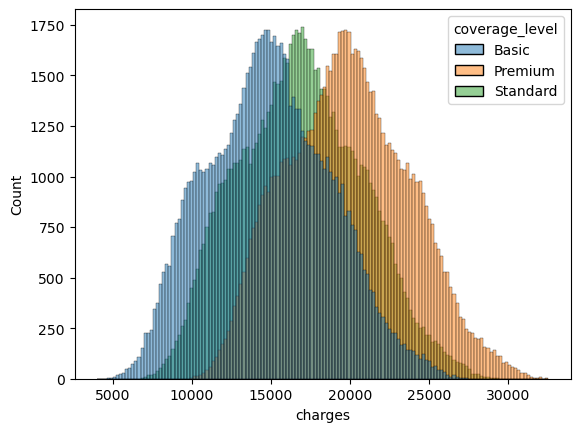

In [86]:
sns.histplot(data=insurance_data,x='charges',hue='coverage_level')


Inference: The analysis of charges against coverage level suggests a hierarchy in health insurance charges, with premium coverage incurring the highest expenses, followed by standard, and basic coverage having the lowest costs. This hierarchy implies a correlation between the level of coverage and the associated health insurance charges. Further statistical tests can validate the observed differences and help quantify the significance of these patterns in determining health insurance costs

In [87]:
#Count Weight_Status with Hue Smoker
smoker_status = insurance_data.groupby(['weight_status', 'smoker']).agg({'charges' : 'mean'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,14132.988984
1,normal,yes,19120.422935
2,obese,no,15024.775649
3,obese,yes,20028.352422
4,overweight,no,14445.008094
5,overweight,yes,19458.583930


<Axes: xlabel='weight_status', ylabel='count'>

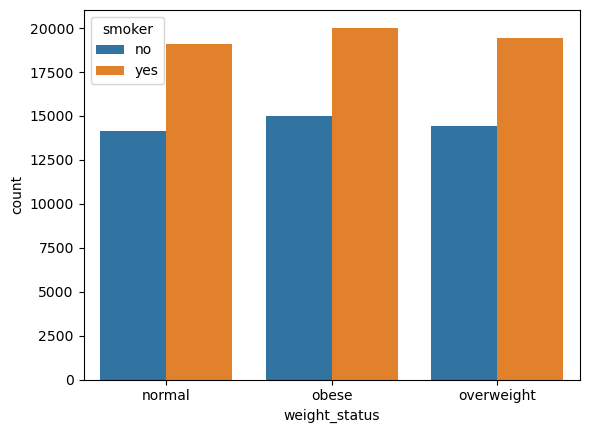

In [88]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

Inference: From the preliminary analysis above, it appears that advanced age, male gender, occupation of white collar and background heart disease are associated with higher insurance charges.

In [89]:
# One-hot encoding for categorical columns
insurance_data_encoded = pd.get_dummies(insurance_data, columns = categorical_columns, drop_first = True).astype(int)

In [90]:
insurance_data_encoded.head()

,age,bmi,children,charges,is_child,is_active,gender_male,smoker_yes,medical_history_Heart disease,medical_history_High blood pressure,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard,weight_status_obese,weight_status_overweight
0,55,36,0,11896,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,64,20,2,9563,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,40,44,2,14036,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,22,32,5,13669,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,64,29,2,9414,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [91]:
insurance_data_encoded.columns

Index(['age', 'bmi', 'children', 'charges', 'is_child', 'is_active',
       'gender_male', 'smoker_yes', 'medical_history_Heart disease',
       'medical_history_High blood pressure', 'medical_history_No history',
       'family_medical_history_Heart disease',
       'family_medical_history_High blood pressure',
       'family_medical_history_No history', 'exercise_frequency_Never',
       'exercise_frequency_Occasionally', 'exercise_frequency_Rarely',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_White collar', 'coverage_level_Premium',
       'coverage_level_Standard', 'weight_status_obese',
       'weight_status_overweight'],
      dtype='object')

In [92]:
##Since above EDA we saw that people with medical history- heart disease contribute to higher insurance premiums,
##we will analyze how heart disease is related to age, gender, BMI, smoking, exercise, or family history

In [93]:
correlations = insurance_data_encoded.corrwith(insurance_data_encoded['family_medical_history_Heart disease'])  #calculates the correlation
(correlations).sort_values(ascending=False)


family_medical_history_Heart disease          1.000000
charges                                       0.394977
smoker_yes                                    0.002691
children                                      0.002679
weight_status_overweight                      0.002246
occupation_White collar                       0.001843
age                                           0.001311
coverage_level_Premium                        0.000998
exercise_frequency_Rarely                     0.000809
exercise_frequency_Occasionally               0.000752
exercise_frequency_Never                      0.000486
occupation_Unemployed                         0.000261
gender_male                                   0.000173
medical_history_No history                    0.000009
medical_history_Heart disease                -0.000064
is_active                                    -0.001121
bmi                                          -0.001140
coverage_level_Standard                      -0.001312
weight_sta

From the above analyses we can observe that family/medical history of High blood pressure do not have heart problems - 
medical/family history of high blood pressue has least correlation with heart problem people


In [94]:
correlations = insurance_data_encoded.corrwith(insurance_data_encoded['charges'])  #calculates the correlation
(correlations).sort_values(ascending=False)

charges                                       1.000000
smoker_yes                                    0.567483
coverage_level_Premium                        0.426794
medical_history_Heart disease                 0.395101
family_medical_history_Heart disease          0.394977
is_active                                     0.142206
occupation_White collar                       0.129751
gender_male                                   0.111777
bmi                                           0.102914
weight_status_obese                           0.084188
children                                      0.080150
age                                           0.066001
exercise_frequency_Occasionally               0.017374
weight_status_overweight                     -0.029254
exercise_frequency_Rarely                    -0.050423
coverage_level_Standard                      -0.052078
occupation_Student                           -0.065222
exercise_frequency_Never                     -0.114044
medical_hi

People who smokes, takes premium coverage level, family/medical history of heart disease make most contribution to charges

# Process Followed & EDA results

- Loaded the data of USA northeast region.
- Checked for null values: 
        Null Values existed in medical_history, family_medical_history, filled these values with No history to retain the data  & avoid data loss 
- Ensured correct data type is assigned to all the variables, (eg: 'gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level' - category) 
- There are no outliers in insurance_dataset
- There are no duplicates in insurance_dataset
- Performed One - hot encoding using 'pd.get_dummies'
- Performed basic EDA, results are as mentioned below:
    - Advanced age, male gender, heart disease & white collar job occupation are associated with higher insurance cost
    - Medical/family history of high blood pressure has least correlation with heart problem people. Family/medical history of High blood pressure do not have heart problems
    - People who smokes, takes premium coverage level, family/medical history of heart disease make most contribution to charges
